# Inaugural Project - Codenomics Crew

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

## Setup
We consider the economy descriped in the 'InauguralProject2024.pdf' file.  
We will not be restating the equations, but they can be found along with our solutions.

# Question 1

We are told, that the initial endowment is:
$$\omega_1^A=0.8$$
$$\omega_2^A=0.3$$

Illustrating the set (i.e. all the Pareto improvements relative to the endowment) in the Edgeworth box

In [3]:
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

N = 75
x_grid = np.linspace(0,1,N+1)



# Calculate initial utilities:
u_A_initial = model.utility_A(par.w1A, par.w2A)
u_B_initial = model.utility_B(par.w1B, par.w2B)

pareto_improvement = [] #Initialise empty list to store pareto improvements

# Iterate through redistributions
for x1A in x_grid:
    for x2A in x_grid:

        # Ensure total endowment of each good is 1
        x1B = 1 - x1A
        x2B = 1 - x2A

        # Calculate utilities
        u_A = x1A**par.alpha * x2A**(1-par.alpha)
        u_B = x1B**par.beta * x2B**(1-par.beta)

        # Check for Pareto improvement
        if u_A > u_A_initial and u_B > u_B_initial:
            pareto_improvement.append((np.array([x1A, x2A]), np.array([x1B, x2B])))

# for allocation in pareto_improvement:
#    print("Consumer A's allocation:",allocation[0], "| Consumer B's allocation:", allocation[1])

In [4]:
# par = model.par

# # a. total endowment
# w1bar = 1.0
# w2bar = 1.0

# # b. figure set up
# fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
# ax_A = fig.add_subplot(1, 1, 1)

# ax_A.set_xlabel("$x_1^A$")
# ax_A.set_ylabel("$x_2^A$")

# temp = ax_A.twinx()
# temp.set_ylabel("$x_2^B$")
# ax_B = temp.twiny()
# ax_B.set_xlabel("$x_1^B$")
# ax_B.invert_xaxis()
# ax_B.invert_yaxis()


# ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
# for allocation in pareto_improvement:
#     ax_A.scatter(allocation[0][0], allocation[0][1], marker='o', color='red')
#     ax_B.scatter(allocation[1][0], allocation[1][1], marker='o', color='red')

# # limits
# ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
# ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
# ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
# ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

# ax_A.set_xlim([-0.1, w1bar + 0.1])
# ax_A.set_ylim([-0.1, w2bar + 0.1])    
# ax_B.set_xlim([w1bar + 0.1, -0.1])
# ax_B.set_ylim([w2bar + 0.1, -0.1])

# ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

Calculating the error in the market clearing conditions

In [5]:
par = model.par
P1 = np.linspace(0.5,2.5,N+1)

eps1 = []
eps2 = []
p_1 = []

for p1 in P1:   
#Loops through every price and calculates demand for each consumer and the error

    demandA1, demandA2 = model.demand_A(p1)     #Calculates demand for good 1 and good 2 for consumer A
    demandB1, demandB2 = model.demand_B(p1)     #Calculates demand for good 1 and good 2 for consumer B

    eps1.append(demandA1-par.w1A+demandB1-par.w1B)   #Adds the error to the list "eps1"
    eps2.append(demandA2-par.w2A+demandB2-par.w2B)   #Adds the error to the list "eps2"
    p_1.append(p1)                                               #Stores the price used for calculating the two errors

    
for price, error1, error2 in zip(p_1, eps1, eps2):
    sign1 = '+' if error1 >= 0 else '-'  # Determine sign for error1
    sign2 = '+' if error2 >= 0 else '-'  # Determine sign for error2
    
    print(f"For price = {price:.2f} ---> epsilon1 = {sign1}{abs(error1):.4f}\t and epsilon2 = {sign2}{abs(error2):.4f}")


For price = 0.50 ---> epsilon1 = +0.5333	 and epsilon2 = -0.2667
For price = 0.53 ---> epsilon1 = +0.4759	 and epsilon2 = -0.2507
For price = 0.55 ---> epsilon1 = +0.4241	 and epsilon2 = -0.2347
For price = 0.58 ---> epsilon1 = +0.3770	 and epsilon2 = -0.2187
For price = 0.61 ---> epsilon1 = +0.3341	 and epsilon2 = -0.2027
For price = 0.63 ---> epsilon1 = +0.2947	 and epsilon2 = -0.1867
For price = 0.66 ---> epsilon1 = +0.2586	 and epsilon2 = -0.1707
For price = 0.69 ---> epsilon1 = +0.2252	 and epsilon2 = -0.1547
For price = 0.71 ---> epsilon1 = +0.1944	 and epsilon2 = -0.1387
For price = 0.74 ---> epsilon1 = +0.1658	 and epsilon2 = -0.1227
For price = 0.77 ---> epsilon1 = +0.1391	 and epsilon2 = -0.1067
For price = 0.79 ---> epsilon1 = +0.1143	 and epsilon2 = -0.0907
For price = 0.82 ---> epsilon1 = +0.0911	 and epsilon2 = -0.0747
For price = 0.85 ---> epsilon1 = +0.0693	 and epsilon2 = -0.0587
For price = 0.87 ---> epsilon1 = +0.0489	 and epsilon2 = -0.0427
For price = 0.90 ---> eps

Below the errors are plotted as functions of the price

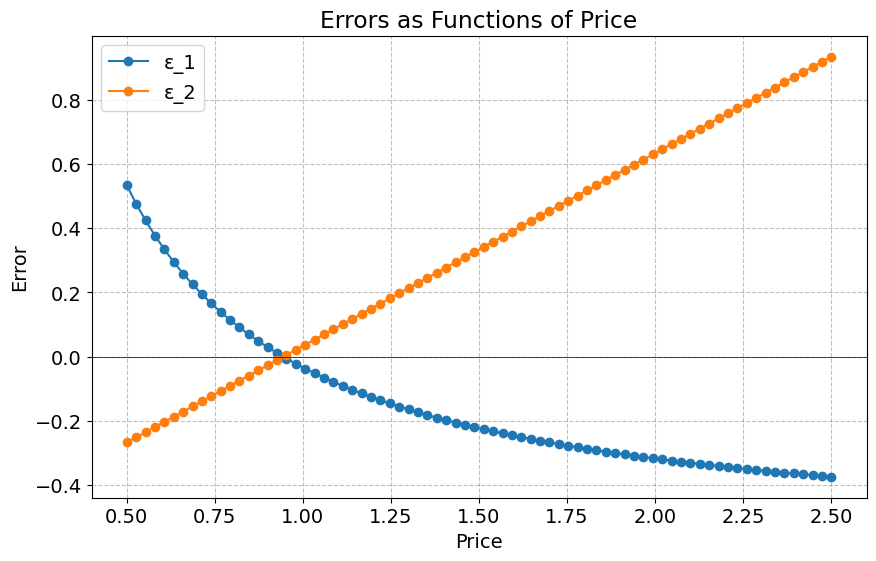

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(p_1, eps1, label='ε_1', marker='o')
plt.plot(p_1, eps2, label='ε_2', marker='o')
plt.xlabel('Price')
plt.ylabel('Error')
plt.title('Errors as Functions of Price')
plt.axhline(0, color='black', linewidth=0.5)  # Adding horizontal line at y=0
plt.legend()
plt.grid(True)
plt.show()

# Question 3

Finding the market clearing price.  
Because of Walras' law, we only need to focus on clearing in the market of good 1.

In [7]:
p1_guess = 1.5
p2 = 1
model.find_equilibrium(p1_guess,p2)

  0: p1 =   1.00000000 -> excess demand ->    -0.03333333
  1: p1 =   0.99833333 -> excess demand ->    -0.03238731
  2: p1 =   0.99671397 -> excess demand ->    -0.03146511
  3: p1 =   0.99514071 -> excess demand ->    -0.03056629
  4: p1 =   0.99361240 -> excess demand ->    -0.02969042
   ...
 25: p1 =   0.97005748 -> excess demand ->    -0.01584217
 50: p1 =   0.95604916 -> excess demand ->    -0.00728292
 75: p1 =   0.94965869 -> excess demand ->    -0.00329439
100: p1 =   0.94677835 -> excess demand ->    -0.00147906
125: p1 =   0.94548729 -> excess demand ->    -0.00066178
150: p1 =   0.94491005 -> excess demand ->    -0.00029565
175: p1 =   0.94465225 -> excess demand ->    -0.00013199
200: p1 =   0.94453718 -> excess demand ->    -0.00005891
225: p1 =   0.94448582 -> excess demand ->    -0.00002629
250: p1 =   0.94446291 -> excess demand ->    -0.00001173
275: p1 =   0.94445268 -> excess demand ->    -0.00000523
300: p1 =   0.94444812 -> excess demand ->    -0.00000234
325: p1

In [8]:
model.print_solution()

Solution to market equilibrium:
p1 = 0.944444460153369

Excess demands are:
Z1 = -9.979787329861267e-09
Z2 = 9.425354940972852e-09


# Question 4

We now assume that consumer A will chose a price that maximizes her own utility.

In [19]:
# 4.a: Consumer A now chooses a price in P1

# Define the number of price points
N = 75
prices = np.linspace(0.5, 2.5, N+1)

# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = np.nan
x1A_allocation = np.nan
x2A_allocation = np.nan
x1B_allocation = np.nan
x2B_allocation = np.nan


for price in prices:
    
    # Calculate consumer A's utility at the equilibrium
    x1A, x2A = model.demand_A(price)[0], model.demand_A(price)[1]

    if x1A <= 1 and x2A <= 1 :
        utility_A = model.utility_A(x1A, x2A)
    
    # Check if this price yields higher utility
        if utility_A > max_utility:
            max_utility = utility_A
            optimal_price = price
            x1A_allocation = x1A
            x2A_allocation = x2A
            x1B_allocation = 1-x1A
            x2B_allocation = 1-x2A

# Print the optimal price and maximum utility
print("Optimal Price for Consumer A:", optimal_price)
print("Maximum Utility of Consumer A:", max_utility)
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)


Optimal Price for Consumer A: 1.4866666666666668
Maximum Utility of Consumer A: 0.690482671836043

Allocation of goods for Consumer A:
  Good 1: 0.3339312406576981
  Good 2: 0.9928888888888892

Allocation of goods for Consumer B:
  Good 1: 0.6660687593423019
  Good 2: 0.007111111111110846


In [20]:
# 4.b: Now consumer A can choose ALL positive values


# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = np.nan
x1A_allocation = np.nan
x2A_allocation = np.nan
x1B_allocation = np.nan
x2B_allocation = np.nan


for price in np.arange(0.1, 100, 0.001):
    
    # Calculate consumer A's utility at the equilibrium
    x1A, x2A = model.demand_A(price)[0], model.demand_A(price)[1]

    if x1A <= 1 and x2A <= 1 :
        utility_A = model.utility_A(x1A, x2A)
    
    # Check if this price yields higher utility
        if utility_A > max_utility:
            max_utility = utility_A
            optimal_price = price
            x1A_allocation = x1A
            x2A_allocation = x2A
            x1B_allocation = 1-x1A
            x2B_allocation = 1-x2A


# Print the optimal price and maximum utility
print("Optimal Price for Consumer A:", optimal_price)
print("Maximum Utility of Consumer A:", max_utility)
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)


Optimal Price for Consumer A: 1.4990000000000014
Maximum Utility of Consumer A: 0.6931455482571316

Allocation of goods for Consumer A:
  Good 1: 0.3333778074271736
  Good 2: 0.9994666666666676

Allocation of goods for Consumer B:
  Good 1: 0.6666221925728264
  Good 2: 0.0005333333333323864


# Question 5

In [11]:
# 5.a: 

par = model.par

# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = np.nan
x1A_allocation = np.nan
x2A_allocation = np.nan
x1B_allocation = np.nan
x2B_allocation = np.nan

p1 = []

for x in x_grid :
    p = par.alpha*par.w2A/(x-par.alpha*par.w1A)
    p1.append(p)

for price in p1:
    
    # Calculate consumer A's utility at the equilibrium
    x1A, x2A = 1-model.demand_B(price)[0], 1-model.demand_B(price)[1]
    utility_A = model.utility_A(x1A, x2A)
    utility_B = model.utility_B(1-x1A, 1-x2A)
    
    # Check if this price yields higher utility
    if utility_A > max_utility and utility_B >= u_B_initial:
        # if [x1A, x2A, 1-x1A, 1-x2A] in pareto_improvement :
        max_utility = utility_A
        optimal_price = price
        x1A_allocation = x1A
        x2A_allocation = x2A
        x1B_allocation = 1-x1A
        x2B_allocation = 1-x2A


# Print the optimal price and maximum utility
print("Optimal Price for Consumer A:", optimal_price)
print("Maximum Utility of Consumer A:", max_utility)
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)


Optimal Price for Consumer A: 1.8749999999999996
Maximum Utility of Consumer A: 0.633602788799771

Allocation of goods for Consumer A:
  Good 1: 0.6177777777777778
  Good 2: 0.6416666666666667

Allocation of goods for Consumer B:
  Good 1: 0.38222222222222224
  Good 2: 0.3583333333333333


/var/folders/_7/kllqzc550gz42jp9k2y1rhbh0000gn/T/ipykernel_8834/197200304.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  p = par.alpha*par.w2A/(x-par.alpha*par.w1A)
/Users/sophiebune/Desktop/projects-2024-codeonomics-crew/inauguralproject/inauguralproject.py:62: RuntimeWarning: invalid value encountered in scalar power
  u_B = x1B**par.beta * x2B**(1-par.beta)
/Users/sophiebune/Desktop/projects-2024-codeonomics-crew/inauguralproject/inauguralproject.py:98: RuntimeWarning: invalid value encountered in scalar divide
  x1B = par.beta*(p1*par.w1B+par.p2*par.w2B)/p1           #Demand for good 1


In [12]:
# 5.b:

par = model.par

# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = np.nan
x1A_allocation = np.nan
x2A_allocation = np.nan
x1B_allocation = np.nan
x2B_allocation = np.nan


for price in np.arange(0.1, 100, 0.001):
    
    # Calculate consumer A's utility at the equilibrium
    x1A, x2A = 1-model.demand_B(price)[0], 1-model.demand_B(price)[1]
    utility_A = model.utility_A(x1A, x2A)
    utility_B = model.utility_B(1-x1A, 1-x2A)
    
    # Check if this price yields higher utility
    if utility_A > max_utility and utility_B >= u_B_initial:
        # if [x1A, x2A, 1-x1A, 1-x2A] in pareto_improvement :
        max_utility = utility_A
        optimal_price = price
        x1A_allocation = x1A
        x2A_allocation = x2A
        x1B_allocation = 1-x1A
        x2B_allocation = 1-x2A


# Print the optimal price and maximum utility
print("Optimal Price for Consumer A:", optimal_price)
print("Maximum Utility of Consumer A:", max_utility)
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)


Optimal Price for Consumer A: 1.8990000000000018
Maximum Utility of Consumer A: 0.6336208470908344

Allocation of goods for Consumer A:
  Good 1: 0.6209232929612081
  Good 2: 0.6400666666666666

Allocation of goods for Consumer B:
  Good 1: 0.3790767070387919
  Good 2: 0.35993333333333344


# Question 6

In [13]:
# 5.b:

par = model.par

# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = np.nan
x1A_allocation = np.nan
x2A_allocation = np.nan
x1B_allocation = np.nan
x2B_allocation = np.nan


for price in np.arange(0.1, 100, 0.001):
    
    # Calculate consumer A's utility at the equilibrium
    x1A, x2A = 1-model.demand_B(price)[0], 1-model.demand_B(price)[1]
    utility_A = model.utility_A(x1A, x2A)
    utility_B = model.utility_B(1-x1A, 1-x2A)
    utility = utility_A + utility_B
    
    # Check if this price yields higher utility
    if utility > max_utility:
        max_utility = utility
        optimal_price = price
        x1A_allocation = x1A
        x2A_allocation = x2A
        x1B_allocation = 1-x1A
        x2B_allocation = 1-x2A


# Print the optimal price and maximum utility
print("Optimal Price for good 1:", optimal_price)
print("Maximum Utility:", max_utility)
# Print the allocations
print("\nAllocation of goods for Consumer A:")
print("  Good 1:", x1A_allocation)
print("  Good 2:", x2A_allocation)

print("\nAllocation of goods for Consumer B:")
print("  Good 1:", x1B_allocation)
print("  Good 2:", x2B_allocation)


Optimal Price for good 1: 0.9340000000000007
Maximum Utility: 1.0579073420396847

Allocation of goods for Consumer A:
  Good 1: 0.36702355460385494
  Good 2: 0.7043999999999999

Allocation of goods for Consumer B:
  Good 1: 0.6329764453961451
  Good 2: 0.2956000000000001


# Question 7

In [14]:
W = []

for n in range(50) :
    W.append([np.random.uniform(0,1),np.random.uniform(0,1)])

print(W)

[[0.6831531700207996, 0.45009278286079124], [0.15826845258178035, 0.4662323188852433], [0.07847047513424676, 0.07352293282817124], [0.053796182197136555, 0.520893388123552], [0.5703363764250845, 0.7627997750898272], [0.3025635878141354, 0.602597668733863], [0.3124910210430547, 0.03177382165017728], [0.5673491370721836, 0.4847920269104474], [0.40941028889343223, 0.3685954698328081], [0.9891820323043595, 0.46258690237113864], [0.0032135774782269255, 0.4699997477630522], [0.6212633866108455, 0.22051267775185002], [0.16359627003677424, 0.16445186728550742], [0.6444036847921516, 0.6041394655261401], [0.11315193231787457, 0.43262329834519475], [0.8434829321354019, 0.3827350369660535], [0.033320320374553014, 0.5207781289014327], [0.6007558360396488, 0.11753704936186948], [0.08145145753600758, 0.20709619213036456], [0.8445377921322954, 0.4893793077674161], [0.7358055609104615, 0.4255237320594675], [0.9158696414048928, 0.6988796257784083], [0.00326139956577276, 0.9655329722030562], [0.207773555

# Question 8

In [15]:
# 5.b:

par = model.par

# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = np.nan
x1A_allocation = np.nan
x2A_allocation = np.nan
x1B_allocation = np.nan
x2B_allocation = np.nan

for w1, w2 in W :

    for price in np.arange(0.1, 100, 0.001):
    
        def demand_B_new(p1):
            x1B = par.beta*(p1*(1-w1)+par.p2*(1-w2))/p1
            x2B = (1-par.beta)*(p1*(1-w1)+par.p2*(1-w2))/par.p2
            return x1B, x2B

        # Calculate consumer A's utility at the equilibrium
        x1A, x2A = 1-model.demand_B(price)[0], 1-model.demand_B(price)[1]
        utility_A = model.utility_A(x1A, x2A)
        utility_B = model.utility_B(1-x1A, 1-x2A)
    
        # Check if this price yields higher utility
        if utility_A > max_utility and utility_B >= u_B_initial:
        # if [x1A, x2A, 1-x1A, 1-x2A] in pareto_improvement :
            max_utility = utility_A
            optimal_price = price
            x1A_allocation = x1A
            x2A_allocation = x2A
            x1B_allocation = 1-x1A
            x2B_allocation = 1-x2A


    # Print the optimal price and maximum utility
    print("Optimal Price for Consumer A:", optimal_price)
    print("Maximum Utility of Consumer A:", max_utility)
    # Print the allocations
    print("\nAllocation of goods for Consumer A:")
    print("  Good 1:", x1A_allocation)
    print("  Good 2:", x2A_allocation)

    print("\nAllocation of goods for Consumer B:")
    print("  Good 1:", x1B_allocation)
    print("  Good 2:", x2B_allocation)

Optimal Price for Consumer A: 1.8990000000000018
Maximum Utility of Consumer A: 0.6336208470908344

Allocation of goods for Consumer A:
  Good 1: 0.6209232929612081
  Good 2: 0.6400666666666666

Allocation of goods for Consumer B:
  Good 1: 0.3790767070387919
  Good 2: 0.35993333333333344
Optimal Price for Consumer A: 1.8990000000000018
Maximum Utility of Consumer A: 0.6336208470908344

Allocation of goods for Consumer A:
  Good 1: 0.6209232929612081
  Good 2: 0.6400666666666666

Allocation of goods for Consumer B:
  Good 1: 0.3790767070387919
  Good 2: 0.35993333333333344
Optimal Price for Consumer A: 1.8990000000000018
Maximum Utility of Consumer A: 0.6336208470908344

Allocation of goods for Consumer A:
  Good 1: 0.6209232929612081
  Good 2: 0.6400666666666666

Allocation of goods for Consumer B:
  Good 1: 0.3790767070387919
  Good 2: 0.35993333333333344
Optimal Price for Consumer A: 1.8990000000000018
Maximum Utility of Consumer A: 0.6336208470908344

Allocation of goods for Consum